In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=101)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)

In [8]:
y_test.dtype

dtype('float64')

In [9]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

In [13]:
def model(x):
    return 1 / (1 + np.exp(-x))

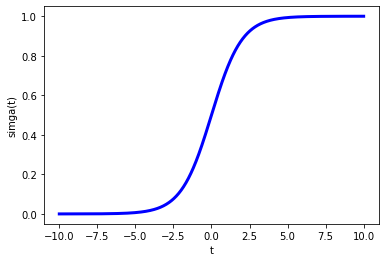

In [14]:
X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('simga(t)')
plt.xlabel('t')
plt.show()

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [21]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

([], <a list of 0 Text major ticklabel objects>)

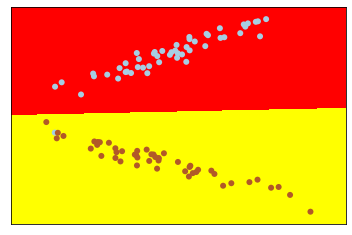

In [29]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

/Users/leclipse/.virtualenvs/regression/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(-4.558444599289613, 4.061555400710203)

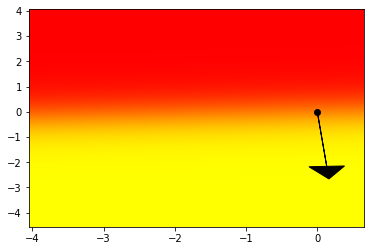

In [37]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [38]:
%timeit clf.fit(X, y)

2.81 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%timeit clf.predict(X)

66.6 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
%timeit clf.predict_proba(X)

84.2 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
